In [1]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [2]:
all_df = pd.read_csv("data/bank.csv")

In [3]:
cols=['age','balance' ,'day', 'duration',
       'campaign','pdays','previous','deposit']
df=all_df[cols]

In [4]:
df['deposit']= df['deposit'].map({'no':0, 'yes': 1}).astype(int)

/home/bruce/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [5]:
X=df.drop(['deposit'], axis=1).values.astype('float64')

In [6]:
Y = df['deposit'].values.astype('int64')

In [7]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

8929

In [8]:
test_Features[:2]

array([[-0.85890111, -0.3021573 , -1.26574556, -0.8008745 , -0.55416834,
        -0.48118405, -0.36325984],
       [ 0.14841574, -0.31455937,  0.51565047, -0.97372895, -0.18678537,
        -0.48118405, -0.36325984]])

In [9]:
train_Label[:4]

array([0, 1, 0, 1])

In [10]:
train_Features.shape

(8929, 7)

In [11]:
test_Label[:4]

array([0, 0, 0, 1])

In [12]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [13]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [14]:
from keras.utils import np_utils
train_Label = train_Label.reshape(train_Label.shape[0], 1)
test_Label= test_Label.reshape(test_Label.shape[0], 1)
train_Label=np_utils.to_categorical(train_Label)
test_Label=np_utils.to_categorical(test_Label)

Using TensorFlow backend.


In [15]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [16]:
model = Sequential()

In [17]:
model.add(SimpleRNN(units=14, input_shape=(7,1)))

In [18]:
model.add(Dense(2, activation = "sigmoid"))

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 14)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 30        
Total params: 254
Trainable params: 254
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [21]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=60, 
                         batch_size=500,verbose=1,callbacks=[early_stopping])

Train on 7143 samples, validate on 1786 samples
Epoch 1/60
7143/7143 [==============================] - 1s 195us/step - loss: 0.6604 - acc: 0.6487 - val_loss: 0.6363 - val_acc: 0.6629
Epoch 2/60
7143/7143 [==============================] - 0s 17us/step - loss: 0.6234 - acc: 0.6782 - val_loss: 0.6062 - val_acc: 0.6887
Epoch 3/60
7143/7143 [==============================] - 0s 22us/step - loss: 0.5982 - acc: 0.6956 - val_loss: 0.5866 - val_acc: 0.7058
Epoch 4/60
7143/7143 [==============================] - 0s 18us/step - loss: 0.5806 - acc: 0.7084 - val_loss: 0.5727 - val_acc: 0.7164
Epoch 5/60
7143/7143 [==============================] - 0s 21us/step - loss: 0.5672 - acc: 0.7152 - val_loss: 0.5612 - val_acc: 0.7220
Epoch 6/60
7143/7143 [==============================] - 0s 22us/step - loss: 0.5562 - acc: 0.7232 - val_loss: 0.5521 - val_acc: 0.7304
Epoch 7/60
7143/7143 [==============================] - 0s 19us/step - loss: 0.5466 - acc: 0.7304 - val_loss: 0.5444 - val_acc: 0.7340
Epoch 

In [22]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

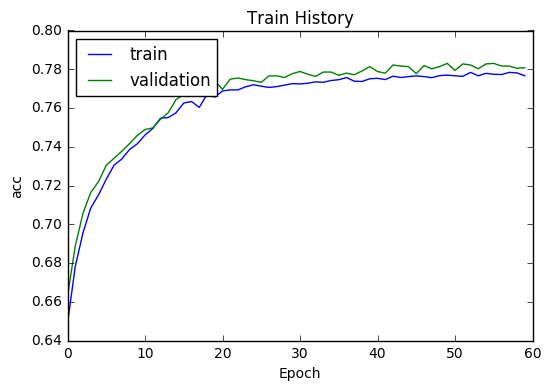

In [23]:
show_train_history(train_history,'acc','val_acc')

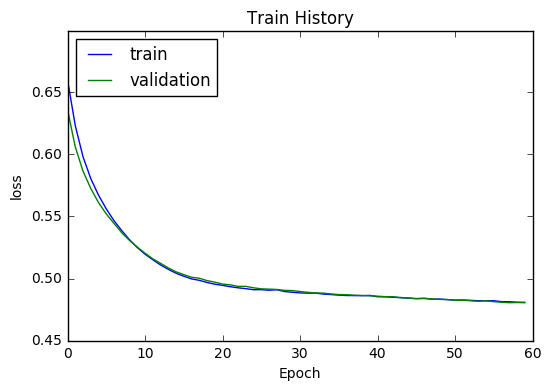

In [24]:
show_train_history(train_history,'loss','val_loss')

In [25]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

2233/2233 [==============================] - 0s 110us/step


In [26]:
scores[1]

0.7702642186468511